To find sales trends month-wise, year-wise, and yearly-month-wise using Python,used libraries such as Pandas and Matplotlib for data manipulation and visualization. Here's a step-by-step guide to achieve this:

1.Data Preparation: Prepare your sales data. It should ideally have columns for date and sales amount.

2.Load Data: Load your data into a Pandas DataFrame.

3.Extract Date Information: Extract year and month from the date column.

4.Aggregate Sales: Aggregate sales data based on your requirements (month-wise, year-wise, yearly-month-wise).

5.Plotting: Use Matplotlib to visualize the trends.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv(r"C:\Users\ACER\Amazon Sales data.csv")
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [2]:
data = data.rename(columns={'Units Sold': 'sales'})
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,sales,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [3]:
# Load data into DataFrame

df = pd.DataFrame(data)
df['Order Date'] = pd.to_datetime(df['Order Date'])

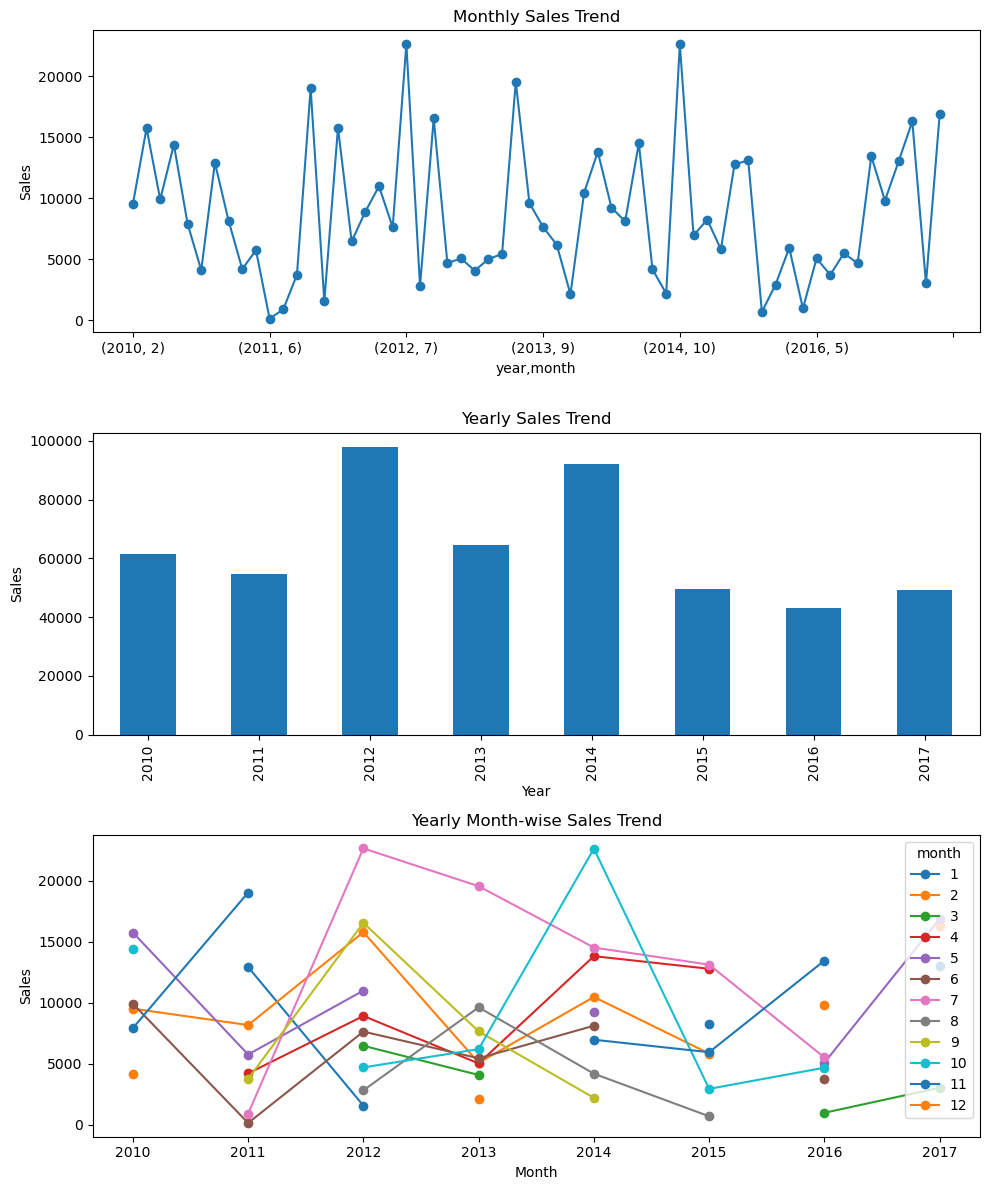

In [4]:
# Extract year and month
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month

# Aggregate sales
monthly_sales = df.groupby(['year', 'month'])['sales'].sum()
yearly_sales = df.groupby('year')['sales'].sum()

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Month-wise
monthly_sales.plot(ax=axes[0], marker='o')
axes[0].set_title('Monthly Sales Trend')
axes[0].set_ylabel('Sales')

# Year-wise
yearly_sales.plot(kind='bar', ax=axes[1])
axes[1].set_title('Yearly Sales Trend')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('Year')

# Yearly-month-wise
yearly_monthly_sales = df.groupby(['year', 'month'])['sales'].sum().unstack()
yearly_monthly_sales.plot(ax=axes[2], marker='o')
axes[2].set_title('Yearly Month-wise Sales Trend')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('Month')


plt.tight_layout()
plt.show()